In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pydataset import data

In [4]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
x = df['total_bill']
y = df['tip']

Text(0, 0.5, 'tip')

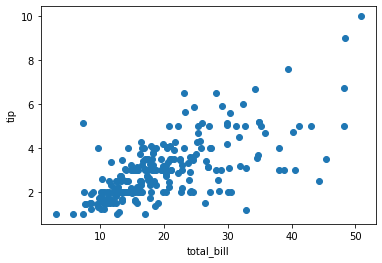

In [8]:
# Lets look at total_bill and tip
plt.scatter(df.total_bill, df.tip)
plt.xlabel('total_bill')
plt.ylabel('tip')

In [9]:
baseline = y.mean()
baseline

2.9982786885245902

In [10]:
df['baseline'] = y.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


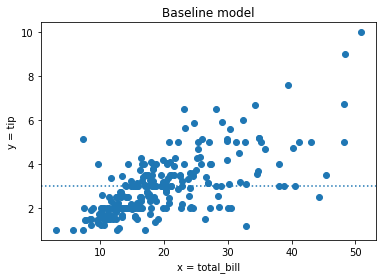

In [12]:
# plot data with baseline:

plt.scatter(x, y)
plt.axhline(y.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');

In [14]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(df[['total_bill']], df.tip)

# make prediction
df['yhat'] = lm.predict(df[['total_bill']])

df

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
241,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
242,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
243,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


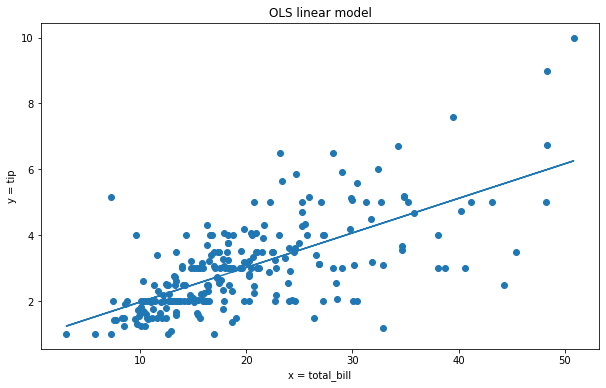

In [23]:
# visualize the line of best fit from OLS linear model
plt.figure(figsize = (10,6))
plt.scatter(x, y)
plt.plot(x, df.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('OLS linear model');

### Residuals

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [25]:
# residual = actual - predicted
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


In [27]:
# sum of residual is zero
df.residual.sum().round()

0.0

In [28]:
# sum of baseline residual is zero too
df.baseline_residual.sum().round()

-0.0

### Residual Plots

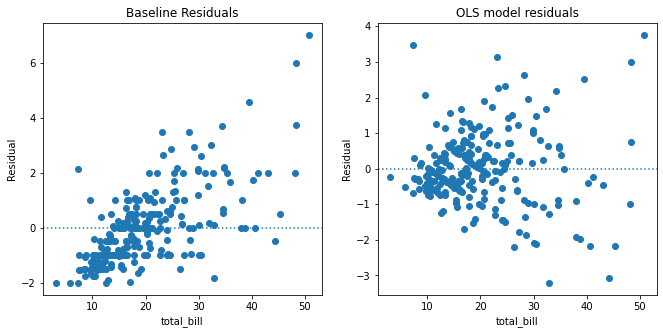

In [29]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.total_bill, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('OLS model residuals');

### SSE (Sum of Squared Errors)

- sum the squared of residuals

In [30]:
# first calculate the square of residuals

df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [33]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "${:.2f}".format(SSE))
print("SSE Baseline =", "${:.2f}".format(SSE_baseline))

SSE = $252.79
SSE Baseline = $465.21


### ESS (Explained Sum of Squares)
- the sum of the difference between each predicted value and the mean of all actual values

In [37]:
ESS = sum((df.yhat - df.tip.mean())**2)
print('ESS =', "${:.2f}".format(ESS))

ESS = $212.42


### TSS (Total Sum of Squares)
- the sum of difference between the actual total_bill and the mean of all total_bill. It can also be derived by summing the ESS and SSE.

In [38]:
TSS = ESS + SSE
print('TSS =','${:.2f}'.format(TSS))

TSS = $465.21


### MSE (Mean Squared Error)

- average of SSE = SSE/(no. of data points)

- the average of your errors that have each been squared


In [34]:
len(df)

244

In [35]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "${:.2f}".format(MSE))
print("MSE baseline = ", "${:.2f}".format(MSE_baseline))

MSE =  $1.04
MSE baseline =  $1.91


### RMSE (Root Mean Squared Error)

- Square root of MSE
- Same units as the output (y) variable

In [36]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "${:.2f}".format(RMSE))
print("RMSE baseline = ", "${:.2f}".format(RMSE_baseline))

RMSE =  $1.02
RMSE baseline =  $1.38


In [44]:
if SSE < SSE_baseline:
    print ("Our model performs better than the baseline model")
else:
    print ("Our model does not perform better than the baseline model")


Our model performs better than the baseline model


### Calculate our R2 score, or variance

In [45]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =   df['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = df['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.45661658635167646

In [46]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(df.tip, df.yhat)

0.45661658635167657